# Recurrent Neural Network

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
# Importing training set 

train = pd.read_csv('./Google_Stock_Price_Train.csv')
training_set = train.iloc[:, 1:2].values

In [9]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

train_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
x_train = []
y_train = []

for i in range(60, 1258):
    x_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

### Reshaping

In [5]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## Model Build

In [6]:
# Architecture
model = tf.keras.models.Sequential([
    
    tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(units = 50, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1)
    
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Compiling the Model

In [7]:
model.compile(optimizer='adam', loss='mean_squared_error')

### Fitting the RNN to the Training set

In [8]:
model.fit(x_train, y_train, epochs= 100, batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
1198/1198 [==============================] - 7s 6ms/sample - loss: 0.0516
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0061
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0045
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0046
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0047
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0050
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0037
Epoch 9/100
1198/1198 [==============================] - 5s 5ms/sample - loss: 0.0038
Epoch 10/100
1198/1198 [==============================] - 5s 5ms/sample - loss: 0.0037
Epoch 11/100
1198/1198 [=====================

1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0012
Epoch 92/100
1198/1198 [==============================] - 5s 5ms/sample - loss: 0.0014
Epoch 93/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0014
Epoch 94/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0014
Epoch 95/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0013
Epoch 96/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0013
Epoch 97/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 5s 5ms/sample - loss: 0.0013
Epoch 99/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0012
Epoch 100/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0010


## Model Evaluation & Predictions

### Getting the real stock price of 2017

In [18]:
test = pd.read_csv('./Google_Stock_Price_Test.csv')
actual_price = test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [21]:
df = pd.concat([train['Open'], test['Open']], axis=0)
inputs = df[len(df) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

preds = model.predict(x_test)
preds = sc.inverse_transform(preds)

### Visualising the results

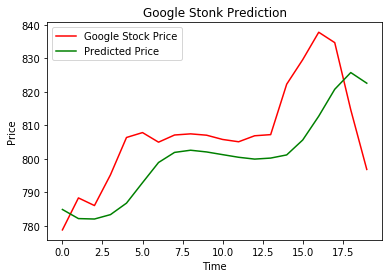

In [23]:
plt.plot(actual_price, color='red', label='Google Stock Price')
plt.plot(preds, color='green', label='Predicted Price')
plt.title('Google Stonk Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()